In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv(r"C:\Users\rkavi\Downloads\IMDb Movies India.csv.zip", encoding='ISO-8859-1')

In [8]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [9]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [10]:
required_columns = ['Rating', 'Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Missing column '{col}' in dataset. Please check and rename appropriately.")

df = df.dropna(subset=required_columns)

In [11]:
df['num_genres'] = df['Genre'].apply(lambda x: len(str(x).split(',')))
df['num_actors'] = df['Actor 1'].apply(lambda x: len(str(x).split(',')))

In [12]:
df['num_genres'] = df['Genre'].apply(lambda x: len(str(x).split(',')))
df['num_actors'] = df['Actor 2'].apply(lambda x: len(str(x).split(',')))

In [13]:
df['num_genres'] = df['Genre'].apply(lambda x: len(str(x).split(',')))
df['num_actors'] = df['Actor 3'].apply(lambda x: len(str(x).split(',')))

In [14]:
genre_dummies = df['Genre'].str.get_dummies(sep=',')
df = pd.concat([df, genre_dummies], axis=1)

In [15]:
top_directors = df['Director'].value_counts().nlargest(20).index
df['Director'] = df['Director'].apply(lambda x: x if x in top_directors else 'Other')
director_dummies = pd.get_dummies(df['Director'], prefix='Director')
df = pd.concat([df, director_dummies], axis=1)

In [16]:
features = ['num_genres', 'num_actors'] + list(genre_dummies.columns) + list(director_dummies.columns)
X = df[features]
y = df['Rating']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [21]:
print("\n✅ Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


✅ Model Evaluation:
RMSE: 1.30
R² Score: 0.09


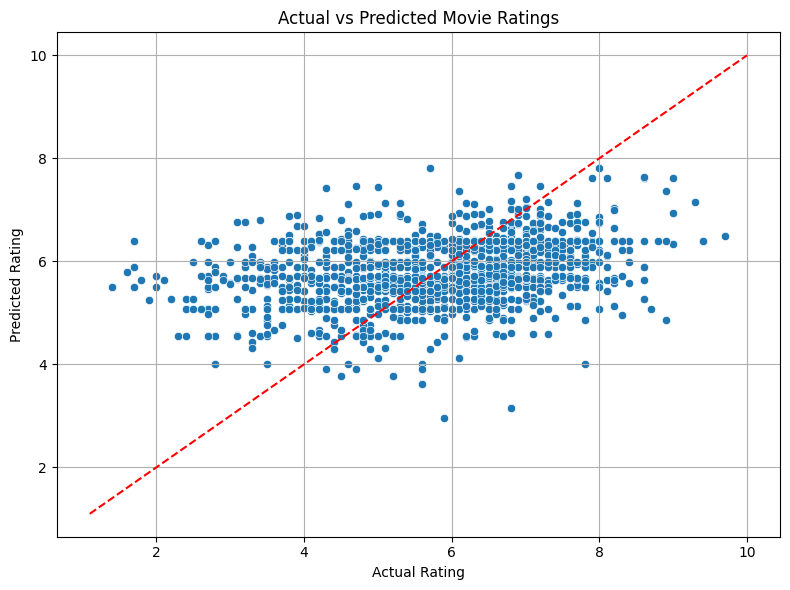

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Movie Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()


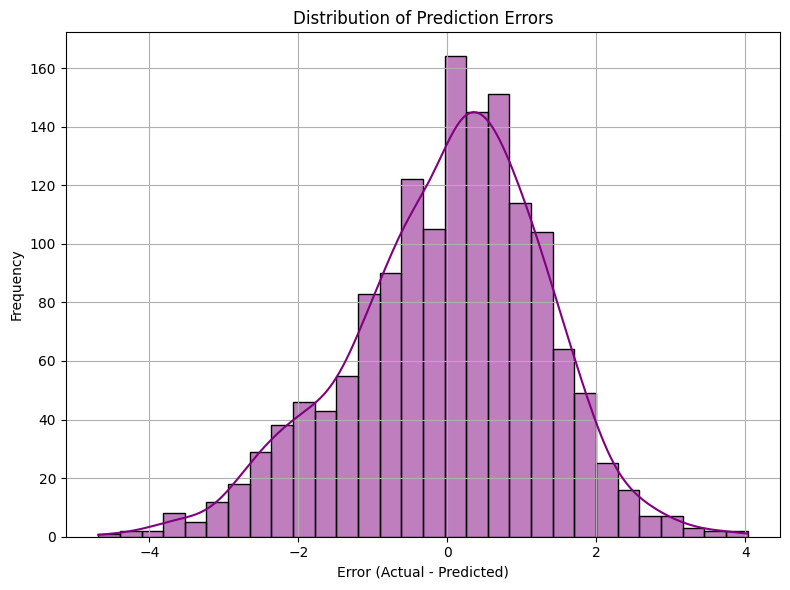

In [23]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


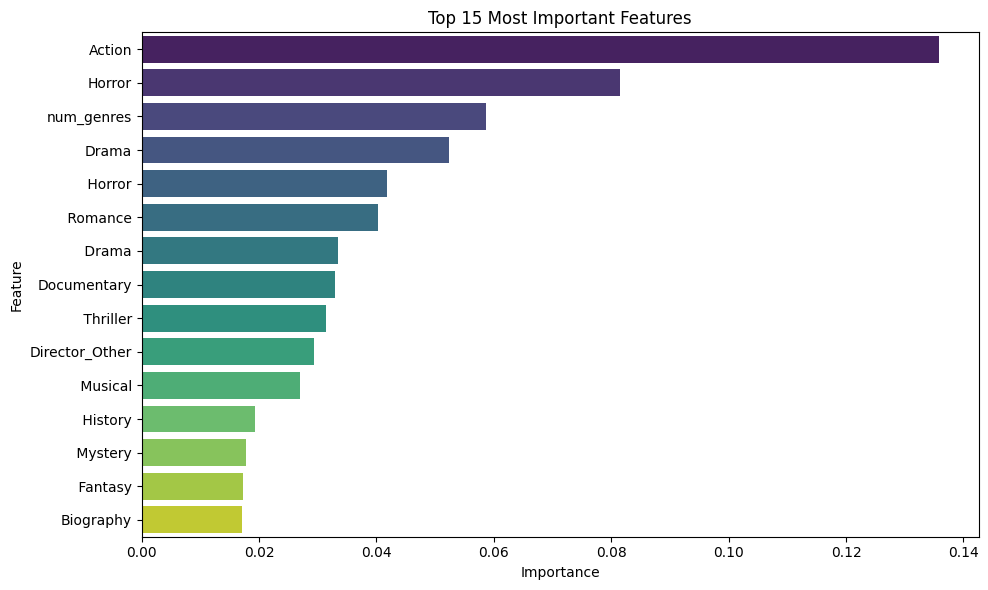

In [24]:
importances = model.feature_importances_
features_list = X.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()


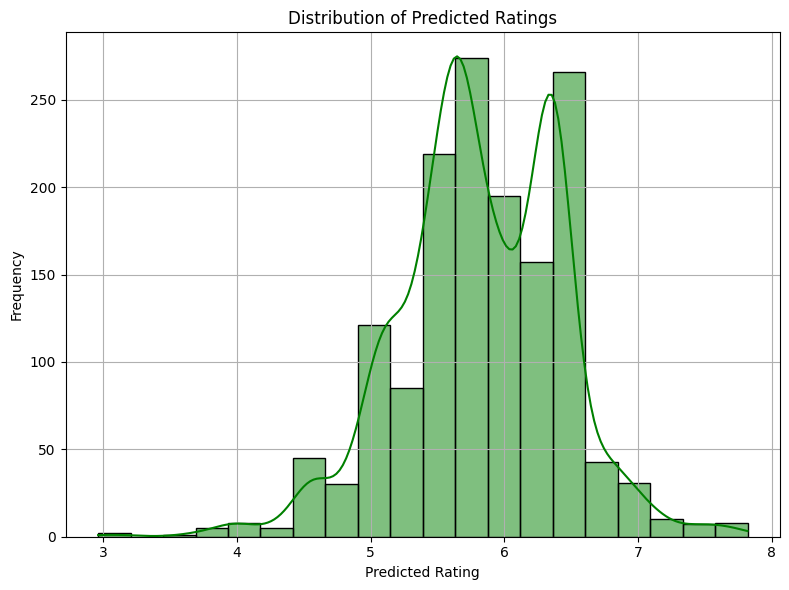

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, bins=20, color='green')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\n✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ RMSE: 1.30
✅ R² Score: 0.09


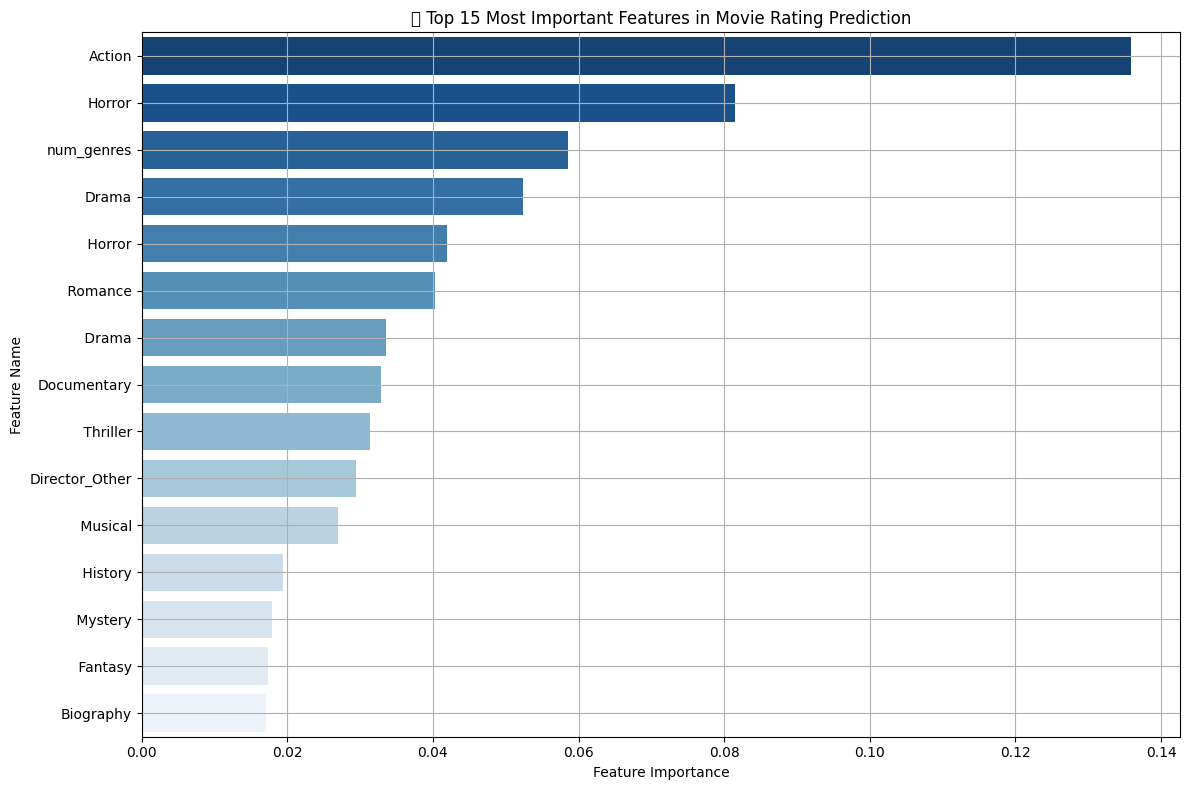

In [29]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Step 2: Create a DataFrame of features and their importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Step 3: Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Step 4: Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_r')
plt.title('🎬 Top 15 Most Important Features in Movie Rating Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.grid(True)
plt.show()

In [32]:
df = df.dropna(subset=['Name', 'Rating'])

In [33]:
df_sorted = df.sort_values(by='Rating', ascending=False)

top_n = 50  
subset = df_sorted.head(top_n)

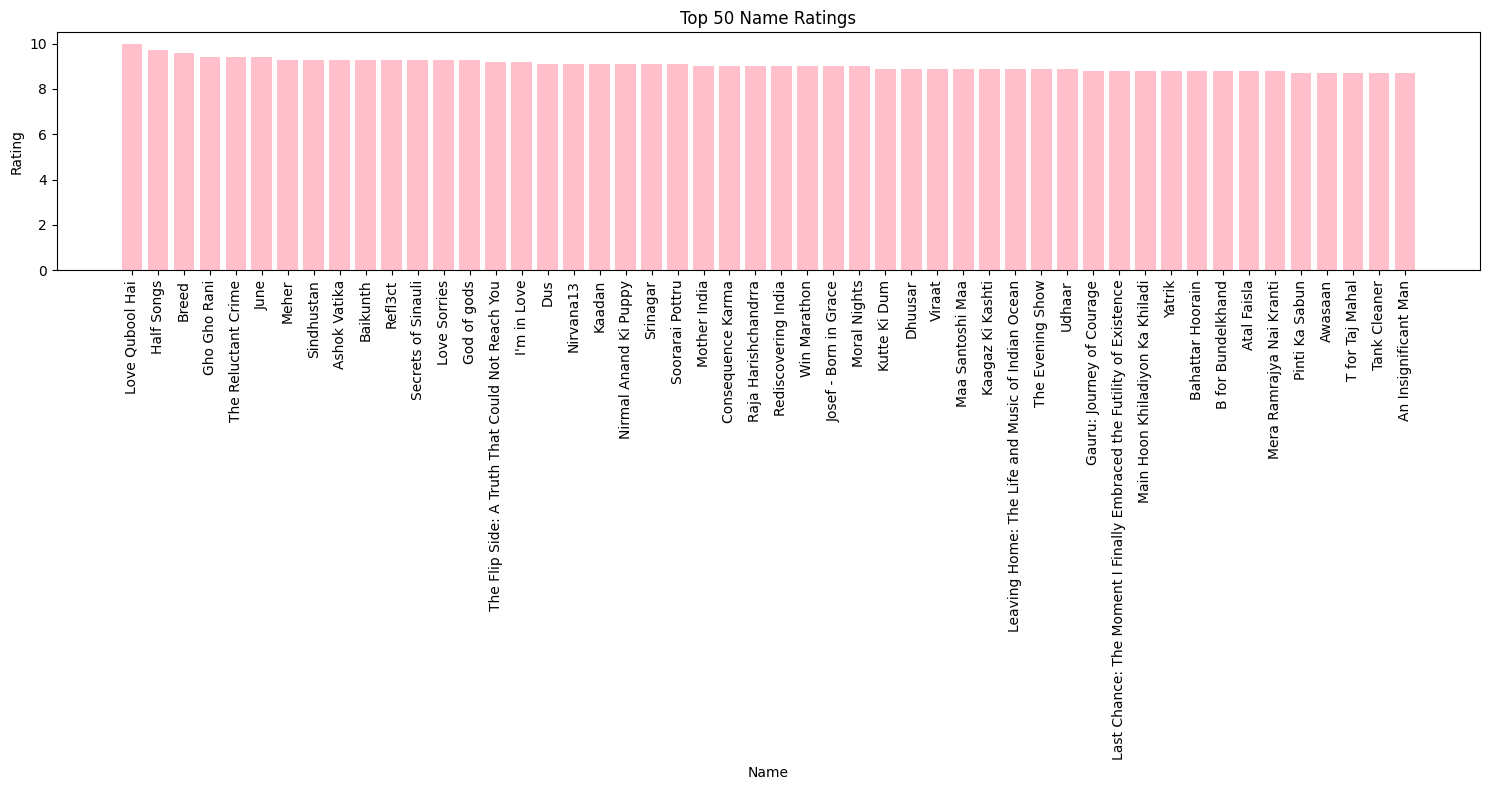

In [35]:
plt.figure(figsize=(15, 8))
plt.bar(subset['Name'], subset['Rating'], color='pink')

plt.xticks(rotation=90)  # Rotate movie names for readability
plt.xlabel('Name')
plt.ylabel('Rating')
plt.title(f'Top {top_n} Name Ratings')
plt.tight_layout()
plt.show()
